## Step 1: Reading and Understanding the Data


In [1]:
#suppressing the warning
import warnings

warnings.filterwarnings('ignore')

In [2]:
#importing the required libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bike_data = pd.read_csv('day.csv')

In [4]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_data.shape

(730, 16)

In [6]:
#Checking if there are any null values and data types
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Cleaning and Transforming the Data

### Step 2.1: Cleaning (dropping unwanted columns) the data



- Column - instant: record index

In [8]:
#instant is nothing but a index and can be dropped. 
bike_data.drop('instant', axis=1, inplace=True)

bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Column 
1. casual: count of casual users
2. registered: count of registered users

In [9]:
# As per the data dictionary and the data: cnt=casual+registered, we must either drop 'cnt' or ('casual' and 'registered'). 
# Since 'cnt' is the target variable, we can't drop 'cnt'. Hence we will drop the other two columns. 

bike_data.drop(['casual', 'registered'], axis=1, inplace=True)

bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


- Column - dteday : date

In [10]:
# We can extract day, month and year from dteday. However, month and year are already present as 'mnth' and 'yr' columns. 
# Day is effectfely a sequence for a particular month, and will not add any value to the model. 
# Hence dteday is redundant and can be dropped.


bike_data.drop(['dteday'], axis=1, inplace=True)

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 2.2: Transforming the numerial but categorical data

- Column - season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [11]:
bike_data['season'] = bike_data['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}) 

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


- Column - mnth : month ( 1 to 12)

In [12]:
bike_data['mnth'] = bike_data['mnth'].replace({1: 'Jan', 2:'Feb', 3: 'Mar', 4:'Apr', 5: 'May', 6:'Jun', 7: 'Jul', 8:'Aug', 9: 'Sep', 10:'Oct', 11: 'Nov', 12:'Dec'}) 

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


- Column - weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [13]:
bike_data['weathersit'] = bike_data['weathersit'].replace({1: 'Clear', 2:'Mist', 3: 'Light_Rain', 4:'Heavy_Rain'}) 

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


- Column - weekday : day of the week 


In [14]:
bike_data['weekday'] = bike_data['weekday'].replace({1: 'Monday', 2:'Tuesday', 3: 'Wednesday', 4:'Thursday', 5: 'Friday', 6:'Saturday', 0: 'Sunday'}) 

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualization

In [15]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Step 3.1: Numerical/Continuous variables

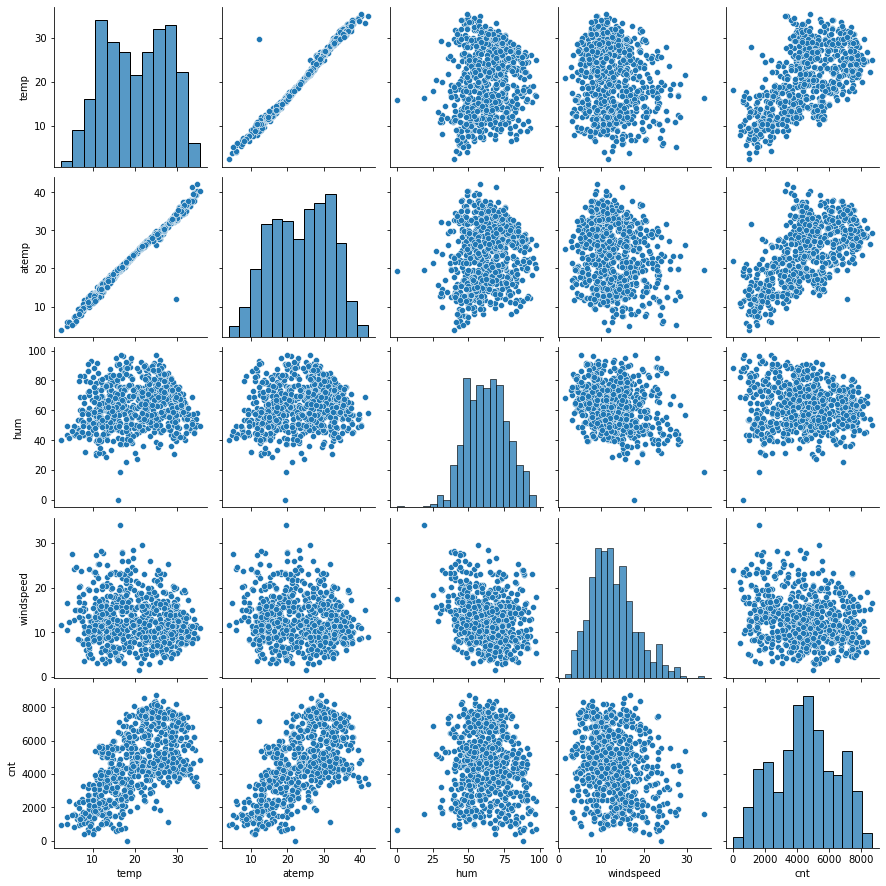

In [16]:
# we know that only the columns 'temp','atemp','hum','windspeed',"cnt" are non categorical

sns.pairplot(bike_data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

- Looking at the plots above, we can conclude that columns temp and atemp are highly correlated (multicolinearity). Hence, one of them can be dropped. 
- Let's also look at the correlations between the variables before deciding which one to drop


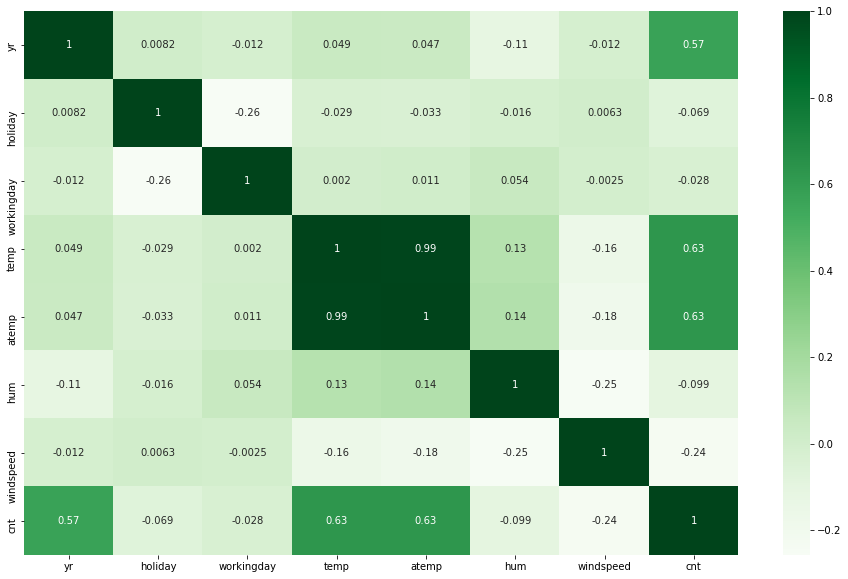

In [17]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(), annot = True, cmap="Greens")
plt.show()

- The correlation between temp and atemp is .99. Further confirming the multicoliearity. Hence 1 can definetely be dropped.
- Both temp and atemp have a correlation of .66 with target variable cnt. Hence either can be dropped.
- Considering that atemp is a derived variable based on temp and other weather factors such humidity, wind etc, we will drop atemp.

In [18]:
#Droping columns atemp
bike_data.drop(['atemp'], axis=1, inplace=True)

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


### Step 3.2: Categorical variables

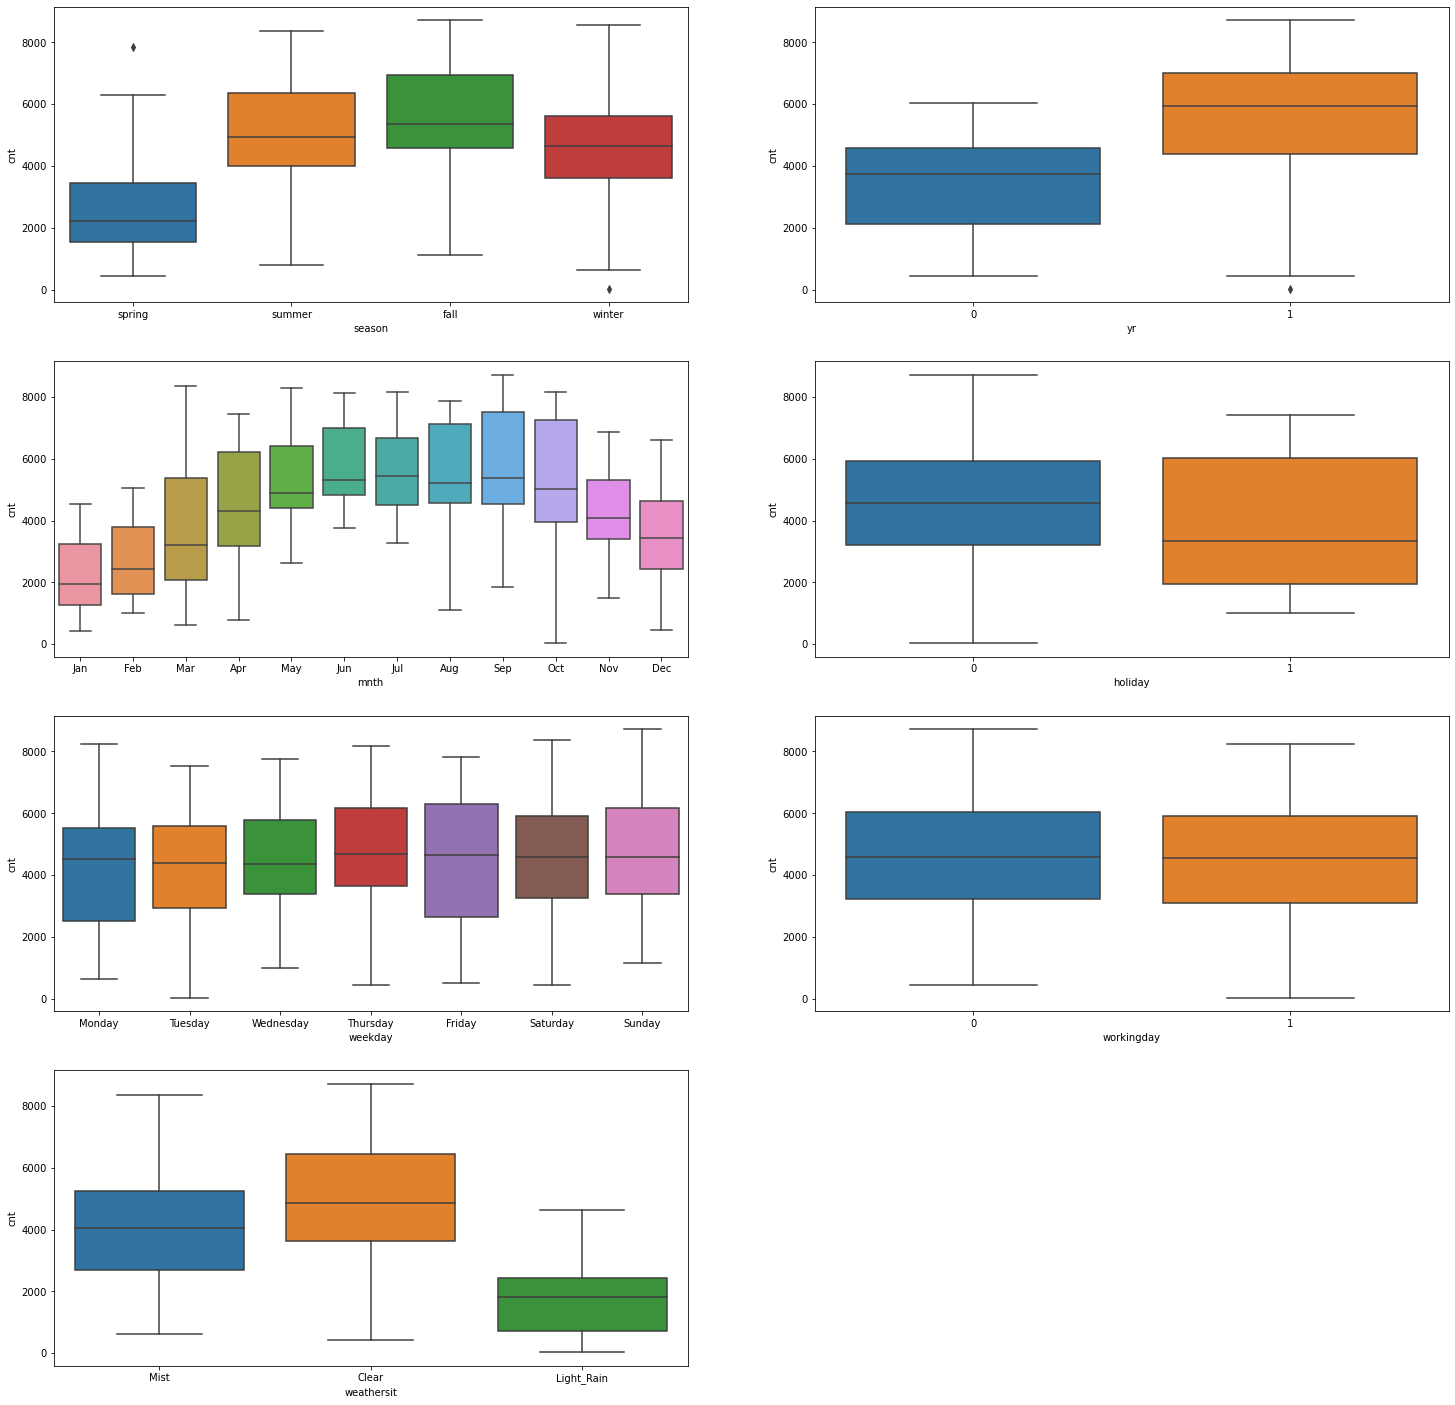

In [19]:
# Categorical variables are 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday' and 'weathersit'.


plt.figure(figsize=(25, 25))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

#### Some Inferences from the above plots
   - Nobody rents a bike when the weather conditions are extremes (weathersit=4).
   - The bike rentals are highest during clear whether (weathersit=1) and considerably decreases during light rain (weathersit=3).
   - The bike rentals are higher in summer and fall months and lower in spring and winter months.
   - The bike rentals medians are lowest in spring, and highest in fall.
   - People tend to rent less on holidays.
   - We can also see that the rentals have increased considerably from the year 2018 to 2019.

## Step 4: Data Preparation


- We will need to substitute categorical variables with dummy variables

1. Dummy variable for 'season'


In [20]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasons'
seasons = pd.get_dummies(bike_data['season'], drop_first = True)

In [21]:
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
# Adding the result to the original dataframe bike_data
bike_data= pd.concat([bike_data, seasons], axis=1)

In [23]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [24]:
# Droping the 'season' column
bike_data.drop(['season'], axis=1, inplace = True)

In [25]:
bike_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


2. Dummy variable for 'mnth', 'weekday', 'weathersit' 


In [26]:
# Get the dummy variables for the feature 'mnth', 'weekday', 'weathersit' and store it in a new variables
# months', weekdays' and 'weather'



months = pd.get_dummies(bike_data['mnth'], drop_first = True)



weekdays = pd.get_dummies(bike_data['weekday'], drop_first = True)



weather = pd.get_dummies(bike_data['weathersit'], drop_first = True)



In [27]:
months.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [28]:
weekdays.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [29]:
weather.head()

,Light_Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [30]:
# Adding the results to the original dataframe bike_data
bike_data= pd.concat([bike_data, months, weekdays,weather], axis=1)

In [31]:
bike_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist
0,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,1
1,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,0,1,0,0,1
2,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Droping the 'mnth', 'weekday', 'weathersit'  columns
bike_data.drop(['mnth', 'weekday', 'weathersit'], axis=1, inplace = True)

In [33]:
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Aug         730 non-null    uint8  
 11  Dec         730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  Jul         730 non-null    uint8  
 15  Jun         730 non-null    uint8  
 16  Mar         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Nov         730 non-null    uint8  
 19  Oct         730 non-null    u

## Step 5: Splitting the data into training and testing sets

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size=.7, random_state=100)

In [37]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [38]:
df_train.shape

(510, 29)

In [39]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
df_test.shape

(220, 29)

### Rescaling the features

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler=MinMaxScaler()

In [43]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [44]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [45]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


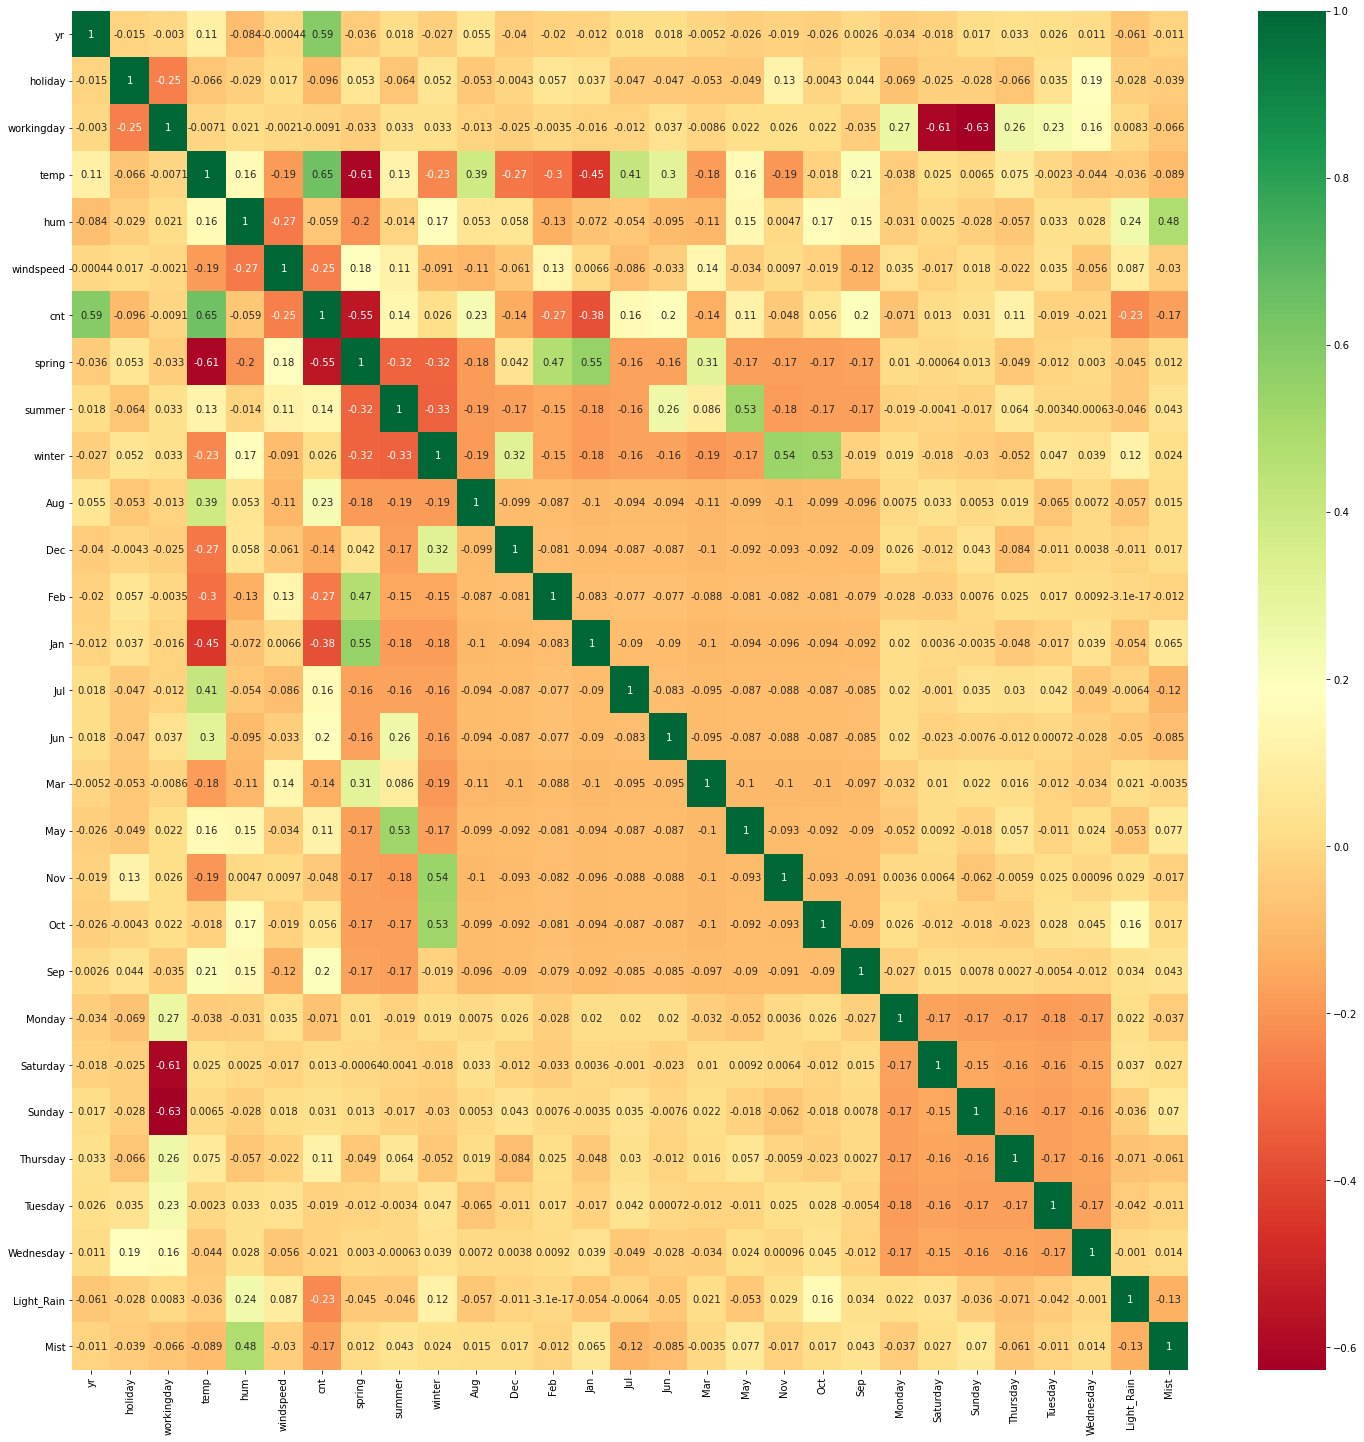

In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

- We can see that the target variable cnt has a good postive correlation with yr and temp
- we can also see that the target variable cnt has good negative correlation with season spring
- It can be seen that months are correlated with respective seasons
- Humidity is related with weather condition Mist
- Workingday has a strong negative relationship with Saturday and Sunday

### Dividing into X and Y sets for the model building

In [47]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)


### RFE
Recursive feature elimination

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [50]:
rfe = RFE(lm, 20)             
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 6),
 ('Mar', False, 9),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 8),
 ('Tuesday', True, 1),
 ('Wednesday', False, 5),
 ('Light_Rain', True, 1),
 ('Mist', True, 1)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep',
       'Saturday', 'Sunday', 'Tuesday', 'Light_Rain', 'Mist'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'May', 'Oct', 'Monday', 'Thursday', 'Wednesday'], dtype='object')

## Step6 : Building model using statsmodel, for the detailed statistics

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [55]:
# Adding a constant variable 
import statsmodels.api as sm

In [56]:
X_train_lm=sm.add_constant(X_train_rfe)

In [57]:
lm= sm.OLS(y_train, X_train_lm).fit()

In [58]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.90e-185
Time:                        11:47:04   Log-Likelihood:                 519.42
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     489   BIC:                            -907.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3800      0.081      4.713      0.000       0.222       0.538
yr             0.2309      0.008     28.600      0.000       0.215       0.247
holiday       -0.1332      0.065     -2.037      0.042      -0.262      -0.005
workingday    -0.0553      0.071     -0.783      0.434      -0.194       0.084
temp           0.4630      0.038     12.149      0.000       0.388       0.538
hum           -0.1510      0.038     -3.990      0.000      -0.225      -0.077
windspeed     -0.1866      0.026     -7.247      0.000      -0.237      -0.136
spring        -0.0516      0.022     -2.345      0.019      -0.095      -0.008
summer         0.0401      0.015      2.607      0.009       0.010       0.070
winter         0.1022      0.018      5.683      0.000       0.067       0.138
Dec           -0.0470      0.018     -2.564      0.011      -0.083      -0.011
Feb           -0.0348      0.022     -1.607      0.109      -0.077       0.008
Jan           -0.0627      0.021     -2.924      0.004      -0.105      -0.021
Jul           -0.0525      0.018     -2.882      0.004      -0.088      -0.017
Nov           -0.0418      0.019     -2.191      0.029      -0.079      -0.004
Sep            0.0737      0.017      4.373      0.000       0.041       0.107
Saturday      -0.0429      0.071     -0.609      0.543      -0.182       0.096
Sunday        -0.0370      0.070     -0.526      0.599      -0.175       0.101
Tuesday       -0.0186      0.011     -1.623      0.105      -0.041       0.004
Light_Rain    -0.2531      0.026     -9.582      0.000      -0.305      -0.201
Mist          -0.0577      0.010     -5.505      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       78.746   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.978
Skew:                          -0.804   Prob(JB):                     2.50e-41
Kurtosis:                       5.493   Cond. No.                         68.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Dropping Sunday because of high p value 
X_train_rfe = X_train_rfe.drop(['Sunday'], axis = 1)

In [60]:
X_train_rfe.shape

(510, 19)

In [61]:
# Rebuilding the model

X_train_lm=sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train,X_train_lm).fit() 
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.80e-186
Time:                        11:47:04   Log-Likelihood:                 519.27
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     490   BIC:                            -913.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3426      0.038      9.074      0.000       0.268       0.417
yr             0.2311      0.008     28.707      0.000       0.215       0.247
holiday       -0.1019      0.027     -3.730      0.000      -0.156      -0.048
workingday    -0.0187      0.012     -1.558      0.120      -0.042       0.005
temp           0.4633      0.038     12.169      0.000       0.389       0.538
hum           -0.1502      0.038     -3.976      0.000      -0.224      -0.076
windspeed     -0.1870      0.026     -7.271      0.000      -0.237      -0.136
spring        -0.0513      0.022     -2.334      0.020      -0.094      -0.008
summer         0.0402      0.015      2.617      0.009       0.010       0.070
winter         0.1022      0.018      5.687      0.000       0.067       0.138
Dec           -0.0468      0.018     -2.559      0.011      -0.083      -0.011
Feb           -0.0345      0.022     -1.597      0.111      -0.077       0.008
Jan           -0.0625      0.021     -2.918      0.004      -0.105      -0.020
Jul           -0.0526      0.018     -2.889      0.004      -0.088      -0.017
Nov           -0.0428      0.019     -2.258      0.024      -0.080      -0.006
Sep            0.0739      0.017      4.389      0.000       0.041       0.107
Saturday      -0.0067      0.015     -0.441      0.659      -0.037       0.023
Tuesday       -0.0183      0.011     -1.602      0.110      -0.041       0.004
Light_Rain    -0.2529      0.026     -9.585      0.000      -0.305      -0.201
Mist          -0.0577      0.010     -5.508      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       78.805   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.010
Skew:                          -0.808   Prob(JB):                     6.69e-41
Kurtosis:                       5.468   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Dropping Saturday because of high p value 
X_train_rfe = X_train_rfe.drop(['Saturday'], axis = 1)

In [63]:
X_train_rfe.shape

(510, 18)

In [64]:
# Rebuilding the model

X_train_lm=sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train,X_train_lm).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.58e-187
Time:                        11:47:04   Log-Likelihood:                 519.17
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     491   BIC:                            -919.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3394      0.037      9.161      0.000       0.267       0.412
yr             0.2312      0.008     28.756      0.000       0.215       0.247
holiday       -0.0991      0.027     -3.735      0.000      -0.151      -0.047
workingday    -0.0154      0.009     -1.642      0.101      -0.034       0.003
temp           0.4629      0.038     12.172      0.000       0.388       0.538
hum           -0.1503      0.038     -3.980      0.000      -0.224      -0.076
windspeed     -0.1867      0.026     -7.269      0.000      -0.237      -0.136
spring        -0.0515      0.022     -2.347      0.019      -0.095      -0.008
summer         0.0401      0.015      2.612      0.009       0.010       0.070
winter         0.1022      0.018      5.690      0.000       0.067       0.137
Dec           -0.0467      0.018     -2.553      0.011      -0.083      -0.011
Feb           -0.0343      0.022     -1.589      0.113      -0.077       0.008
Jan           -0.0625      0.021     -2.922      0.004      -0.105      -0.020
Jul           -0.0524      0.018     -2.880      0.004      -0.088      -0.017
Nov           -0.0433      0.019     -2.288      0.023      -0.080      -0.006
Sep            0.0739      0.017      4.392      0.000       0.041       0.107
Tuesday       -0.0183      0.011     -1.604      0.109      -0.041       0.004
Light_Rain    -0.2534      0.026     -9.618      0.000      -0.305      -0.202
Mist          -0.0575      0.010     -5.504      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.751   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.253
Skew:                          -0.799   Prob(JB):                     2.66e-40
Kurtosis:                       5.455   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Dropping Feb because of high p value 
X_train_rfe = X_train_rfe.drop(['Feb'], axis = 1)

In [66]:
X_train_rfe.shape

(510, 17)

In [67]:
# Rebuilding the model

X_train_lm=sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_lm).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.29e-188
Time:                        11:47:04   Log-Likelihood:                 517.86
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     492   BIC:                            -923.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3284      0.036      9.009      0.000       0.257       0.400
yr             0.2309      0.008     28.679      0.000       0.215       0.247
holiday       -0.1016      0.027     -3.830      0.000      -0.154      -0.049
workingday    -0.0156      0.009     -1.664      0.097      -0.034       0.003
temp           0.4782      0.037     12.975      0.000       0.406       0.551
hum           -0.1521      0.038     -4.026      0.000      -0.226      -0.078
windspeed     -0.1855      0.026     -7.214      0.000      -0.236      -0.135
spring        -0.0609      0.021     -2.879      0.004      -0.102      -0.019
summer         0.0433      0.015      2.839      0.005       0.013       0.073
winter         0.1039      0.018      5.786      0.000       0.069       0.139
Dec           -0.0379      0.017     -2.169      0.031      -0.072      -0.004
Jan           -0.0442      0.018     -2.448      0.015      -0.080      -0.009
Jul           -0.0533      0.018     -2.928      0.004      -0.089      -0.018
Nov           -0.0386      0.019     -2.063      0.040      -0.075      -0.002
Sep            0.0753      0.017      4.479      0.000       0.042       0.108
Tuesday       -0.0185      0.011     -1.618      0.106      -0.041       0.004
Light_Rain    -0.2521      0.026     -9.559      0.000      -0.304      -0.200
Mist          -0.0573      0.010     -5.472      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       73.145   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.763
Skew:                          -0.758   Prob(JB):                     1.37e-37
Kurtosis:                       5.386   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Dropping Tuesday because of high p value 
X_train_rfe = X_train_rfe.drop(['Tuesday'], axis = 1)

In [69]:
# Rebuilding the model

X_train_lm=sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train,X_train_lm).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.19e-188
Time:                        11:47:04   Log-Likelihood:                 516.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     493   BIC:                            -927.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3321      0.036      9.117      0.000       0.261       0.404
yr             0.2305      0.008     28.594      0.000       0.215       0.246
holiday       -0.1058      0.026     -4.001      0.000      -0.158      -0.054
workingday    -0.0194      0.009     -2.125      0.034      -0.037      -0.001
temp           0.4787      0.037     12.966      0.000       0.406       0.551
hum           -0.1560      0.038     -4.129      0.000      -0.230      -0.082
windspeed     -0.1879      0.026     -7.309      0.000      -0.238      -0.137
spring        -0.0618      0.021     -2.919      0.004      -0.103      -0.020
summer         0.0426      0.015      2.791      0.005       0.013       0.073
winter         0.1023      0.018      5.698      0.000       0.067       0.138
Dec           -0.0371      0.017     -2.125      0.034      -0.071      -0.003
Jan           -0.0437      0.018     -2.417      0.016      -0.079      -0.008
Jul           -0.0555      0.018     -3.055      0.002      -0.091      -0.020
Nov           -0.0380      0.019     -2.026      0.043      -0.075      -0.001
Sep            0.0748      0.017      4.442      0.000       0.042       0.108
Light_Rain    -0.2490      0.026     -9.451      0.000      -0.301      -0.197
Mist          -0.0568      0.010     -5.421      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.425
Skew:                          -0.747   Prob(JB):                     4.41e-37
Kurtosis:                       5.377   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
X_train_rfe.shape

(510, 16)

- Checking VIF

In [71]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light_Rain',
       'Mist'],
      dtype='object')

In [72]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,31.85
3,temp,17.92
5,windspeed,4.76
6,spring,4.42
8,winter,4.10
2,workingday,3.69
7,summer,2.85
15,Mist,2.37
0,yr,2.09
12,Nov,1.85


In [73]:
# hum has a very high VIF, hence dropping it and rebuilding the model

X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)

# Rebuilding the model

X_train_lm=sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train,X_train_lm).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.69e-186
Time:                        11:47:04   Log-Likelihood:                 507.84
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     494   BIC:                            -915.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2627      0.033      8.000      0.000       0.198       0.327
yr             0.2343      0.008     28.811      0.000       0.218       0.250
holiday       -0.1087      0.027     -4.046      0.000      -0.161      -0.056
workingday    -0.0223      0.009     -2.413      0.016      -0.040      -0.004
temp           0.4373      0.036     12.112      0.000       0.366       0.508
windspeed     -0.1589      0.025     -6.323      0.000      -0.208      -0.110
spring        -0.0715      0.021     -3.341      0.001      -0.114      -0.029
summer         0.0356      0.015      2.305      0.022       0.005       0.066
winter         0.0880      0.018      4.915      0.000       0.053       0.123
Dec           -0.0444      0.018     -2.514      0.012      -0.079      -0.010
Jan           -0.0500      0.018     -2.734      0.006      -0.086      -0.014
Jul           -0.0506      0.018     -2.745      0.006      -0.087      -0.014
Nov           -0.0387      0.019     -2.029      0.043      -0.076      -0.001
Sep            0.0683      0.017      4.007      0.000       0.035       0.102
Light_Rain    -0.2927      0.025    -11.935      0.000      -0.341      -0.245
Mist          -0.0819      0.009     -9.414      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       74.623   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.133
Skew:                          -0.766   Prob(JB):                     5.66e-39
Kurtosis:                       5.437   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light_Rain', 'Mist'],
      dtype='object')

In [75]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.11
4,windspeed,4.69
2,workingday,3.58
5,spring,3.08
7,winter,3.08
6,summer,2.33
0,yr,2.07
11,Nov,1.82
9,Jan,1.66
10,Jul,1.59


In [76]:
# Nov has a high p value (close to .05), hence dropping it and rebuilding the model.

X_train_rfe = X_train_rfe.drop(['Nov'], axis = 1)

# Rebuilding the model

X_train_lm=sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train,X_train_lm).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.05e-186
Time:                        11:47:04   Log-Likelihood:                 505.73
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     495   BIC:                            -917.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.715      0.000       0.184       0.309
yr             0.2342      0.008     28.700      0.000       0.218       0.250
holiday       -0.1152      0.027     -4.307      0.000      -0.168      -0.063
workingday    -0.0227      0.009     -2.444      0.015      -0.041      -0.004
temp           0.4563      0.035     13.041      0.000       0.388       0.525
windspeed     -0.1598      0.025     -6.339      0.000      -0.209      -0.110
spring        -0.0636      0.021     -3.013      0.003      -0.105      -0.022
summer         0.0409      0.015      2.685      0.007       0.011       0.071
winter         0.0788      0.017      4.535      0.000       0.045       0.113
Dec           -0.0302      0.016     -1.857      0.064      -0.062       0.002
Jan           -0.0453      0.018     -2.486      0.013      -0.081      -0.009
Jul           -0.0504      0.018     -2.728      0.007      -0.087      -0.014
Sep            0.0736      0.017      4.359      0.000       0.040       0.107
Light_Rain    -0.2889      0.025    -11.777      0.000      -0.337      -0.241
Mist          -0.0811      0.009     -9.310      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       68.917   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.399
Skew:                          -0.733   Prob(JB):                     8.07e-34
Kurtosis:                       5.241   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Calculate the VIFs for the new model


vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.05
4,windspeed,4.64
2,workingday,3.55
5,spring,3.08
6,summer,2.33
7,winter,2.25
0,yr,2.07
9,Jan,1.66
10,Jul,1.59
13,Mist,1.57


In [78]:
# Now Dec has a high p value (higher than .05), hence dropping it and rebuilding the model.

X_train_rfe = X_train_rfe.drop(['Dec'], axis = 1)

# Rebuilding the model

X_train_lm=sm.add_constant(X_train_rfe)
lm_7 = sm.OLS(y_train,X_train_lm).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.87e-187
Time:                        11:47:04   Log-Likelihood:                 503.96
No. Observations:                 510   AIC:                            -979.9
Df Residuals:                     496   BIC:                            -920.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2322      0.031      7.469      0.000       0.171       0.293
yr             0.2342      0.008     28.631      0.000       0.218       0.250
holiday       -0.1130      0.027     -4.220      0.000      -0.166      -0.060
workingday    -0.0218      0.009     -2.350      0.019      -0.040      -0.004
temp           0.4713      0.034     13.810      0.000       0.404       0.538
windspeed     -0.1550      0.025     -6.167      0.000      -0.204      -0.106
spring        -0.0620      0.021     -2.932      0.004      -0.104      -0.020
summer         0.0441      0.015      2.906      0.004       0.014       0.074
winter         0.0768      0.017      4.420      0.000       0.043       0.111
Jan           -0.0379      0.018     -2.129      0.034      -0.073      -0.003
Jul           -0.0509      0.019     -2.747      0.006      -0.087      -0.014
Sep            0.0760      0.017      4.502      0.000       0.043       0.109
Light_Rain    -0.2863      0.025    -11.661      0.000      -0.335      -0.238
Mist          -0.0810      0.009     -9.275      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       65.056   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.379
Skew:                          -0.706   Prob(JB):                     5.42e-31
Kurtosis:                       5.136   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Calculate the VIFs for the new model


vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.04
4,windspeed,4.64
2,workingday,3.55
5,spring,2.94
6,summer,2.32
0,yr,2.07
7,winter,1.98
8,Jan,1.62
9,Jul,1.59
12,Mist,1.57


- We notice that even though the VIF value for temp is high (6.04), dropping it degrades our model significatnly (from R-square .839 to .777). Hence we will keep temp and consider lm_7 as the final model.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [80]:
y_train_cnt = lm_7.predict(X_train_lm)

Text(0.5, 0, 'Errors')

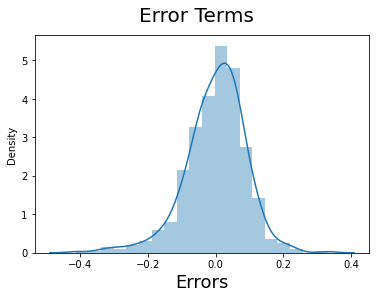

In [81]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- We can see that the error terms follows a standard normal distribution and the mean is around 0. Hence validating our assumptions for Linear Regression

## Step 7: Making Predictions

#### Applying the scaling on the test sets

In [82]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [83]:
y_test = df_test.pop('cnt')
X_test = df_test

In [84]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'Jul', 'Sep', 'Light_Rain', 'Mist'],
      dtype='object')

In [85]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [86]:
# Making predictions
y_pred = lm_7.predict(X_test_new)

## Step 8 : Model Evaluation

Text(0, 0.5, 'y_pred')

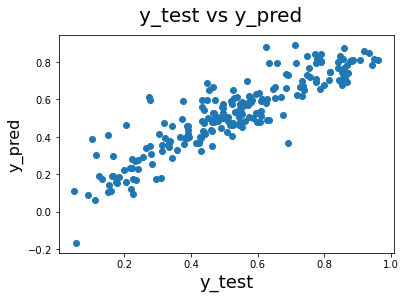

In [87]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [88]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.8050424905556028

In [89]:
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.87e-187
Time:                        11:47:05   Log-Likelihood:                 503.96
No. Observations:                 510   AIC:                            -979.9
Df Residuals:                     496   BIC:                            -920.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2322      0.031      7.469      0.000       0.171       0.293
yr             0.2342      0.008     28.631      0.000       0.218       0.250
holiday       -0.1130      0.027     -4.220      0.000      -0.166      -0.060
workingday    -0.0218      0.009     -2.350      0.019      -0.040      -0.004
temp           0.4713      0.034     13.810      0.000       0.404       0.538
windspeed     -0.1550      0.025     -6.167      0.000      -0.204      -0.106
spring        -0.0620      0.021     -2.932      0.004      -0.104      -0.020
summer         0.0441      0.015      2.906      0.004       0.014       0.074
winter         0.0768      0.017      4.420      0.000       0.043       0.111
Jan           -0.0379      0.018     -2.129      0.034      -0.073      -0.003
Jul           -0.0509      0.019     -2.747      0.006      -0.087      -0.014
Sep            0.0760      0.017      4.502      0.000       0.043       0.109
Light_Rain    -0.2863      0.025    -11.661      0.000      -0.335      -0.238
Mist          -0.0810      0.009     -9.275      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       65.056   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.379
Skew:                          -0.706   Prob(JB):                     5.42e-31
Kurtosis:                       5.136   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inferences
- R Square for training set was 0.84 while the R Square for test set is 0.805. They are close enough, and high enough to accept the model as a good model

- We can see that the equation of our best fitted line is:

$ cnt = 0.232 + 0.234  \times  yr + 0.471 \times temp + 0.044 \times summer + 0.077 \times winter + 0.076 \times Sep - 0.113 \times holiday - 0.022 \times workingdat - 0.155 \times windspeed - 0.062 \times spring - 0.038 \times Jan - 0.051 \times Jul - 0.286 \times LightRain $

- Other inferences from the model
    -	Nobody rents a bike when the weather conditions are extremes (weathersit=4).
    -	The bike rentals are highest during clear whether (weathersit=1) and considerably decreases during light rain (weathersit=3).
    -	The bike rentals are higher in summer and fall months and lower in spring and winter months.
    -	The bike rentals medians are lowest in spring, and highest in fall.
    -	People tend to rent less on holidays.
    -	We can also see that the rentals have increased considerably from the year 2018 to 2019.
    -	Whether a day is working or non-working does not have much impact on the median of number of people renting
    

- The top 3 features are below
    1.	temp : + 0.4713 coefficient 
    2.	yr : + 0.2342 coefficient 
    3.	light_rain : -0.2863
